In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [93]:
supermarketSales = pd.read_csv('./data/supermarket_sales - Sheet1.csv')

In [94]:
supermarketSales.head()
#cogs = factura
#gross margin percentage = marge brut (ingressos - cost/ingressos)
##ingressos que ha sobrat a una empresa després de pagar totes les despeses 
##directes relacionades amb la fabricació d'un producte o la prestació d'un servei.
#gross income = ingressos bruts


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [95]:
supermarketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [96]:
supermarketSales.shape

(1000, 17)

In [107]:
supermarketSales.isnull().sum() #to check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
dtype: int64

In [97]:
supermarketSales['Date'] = pd.to_datetime(supermarketSales['Date']) #convert Date object to type date
supermarketSales['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [98]:
supermarketSales['Year'] = (supermarketSales['Date']).dt.year
supermarketSales['Year'].nunique() #only one year data


1

In [99]:
supermarketSales['Year'].unique() #2019

array([2019], dtype=int64)

In [100]:
supermarketSales.drop('Year', axis=1, inplace=True)
#supermarketSales.Columns.Remove("Year")

In [101]:
supermarketSales['Month'] = (supermarketSales['Date']).dt.month
supermarketSales['Month'].nunique()

3

In [102]:
#supermarketSales['Date'] = pd.to_datetime(supermarketSales['Date']) #convert Date object to type date
supermarketSales['Date'] = supermarketSales['Date'].dt.strftime('%m-%d') #delete year from date

In [103]:
supermarketSales['Date'].head()

0    01-05
1    03-08
2    03-03
3    01-27
4    02-08
Name: Date, dtype: object

In [104]:
supermarketSales.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [105]:
supermarketSales.describe()
#std = standard deviation 
## is a measure of the amount of variation or dispersion of a set of values

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,3.000000


In [ ]:
#fer per dies i mesos

In [108]:
supermarketSales['Branch'].nunique()

3

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

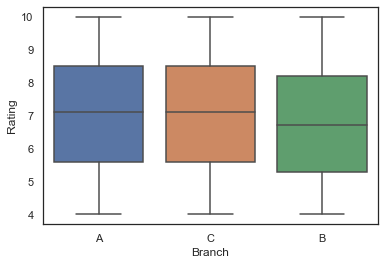

In [129]:
sns.boxplot(x="Branch", y="Rating", data = supermarketSales)

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

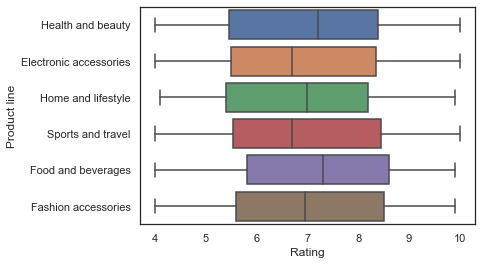

In [134]:
sns.boxplot(y="Product line", x="Rating", data = supermarketSales)
#comparar respecte preus

<AxesSubplot:xlabel='gross income', ylabel='Product line'>

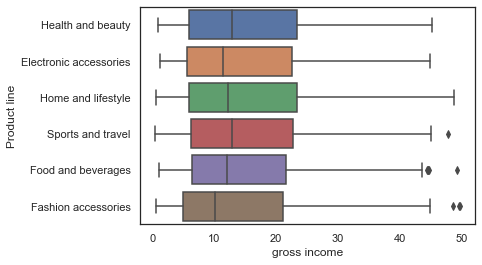

In [146]:
sns.boxplot(y="Product line", x="gross income", data = supermarketSales)


In [109]:
supermarketSales['Gender'].nunique()

2

In [127]:
supermarketSales['gross margin percentage'].nunique()

1

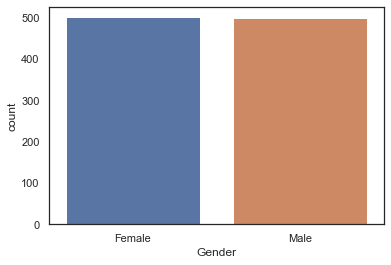

In [112]:
sns.set(style="white")
gender = sns.countplot(x = "Gender", data = supermarketSales) 

<AxesSubplot:>

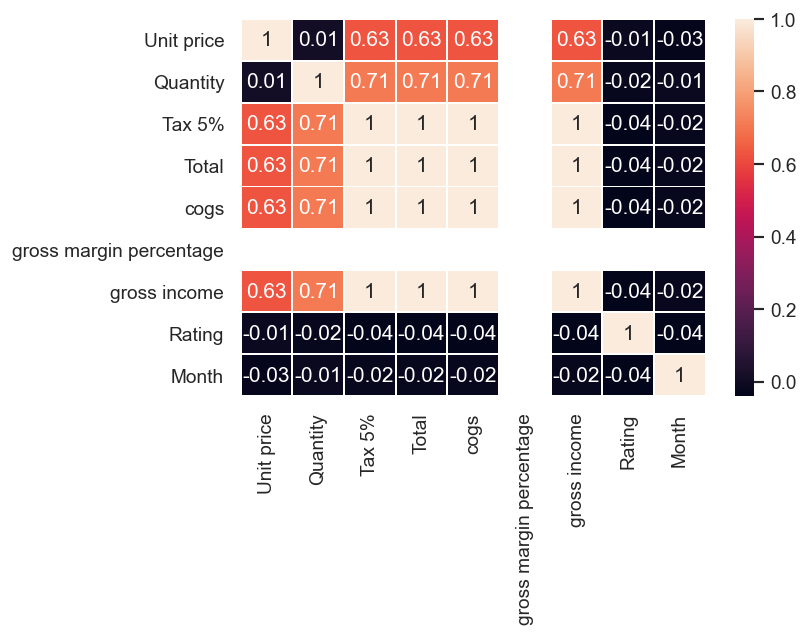

In [124]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = supermarketSales.corr()

plt.figure(dpi=125)

sns.heatmap(np.round(correlacio,2), annot=True, linewidths=.5)

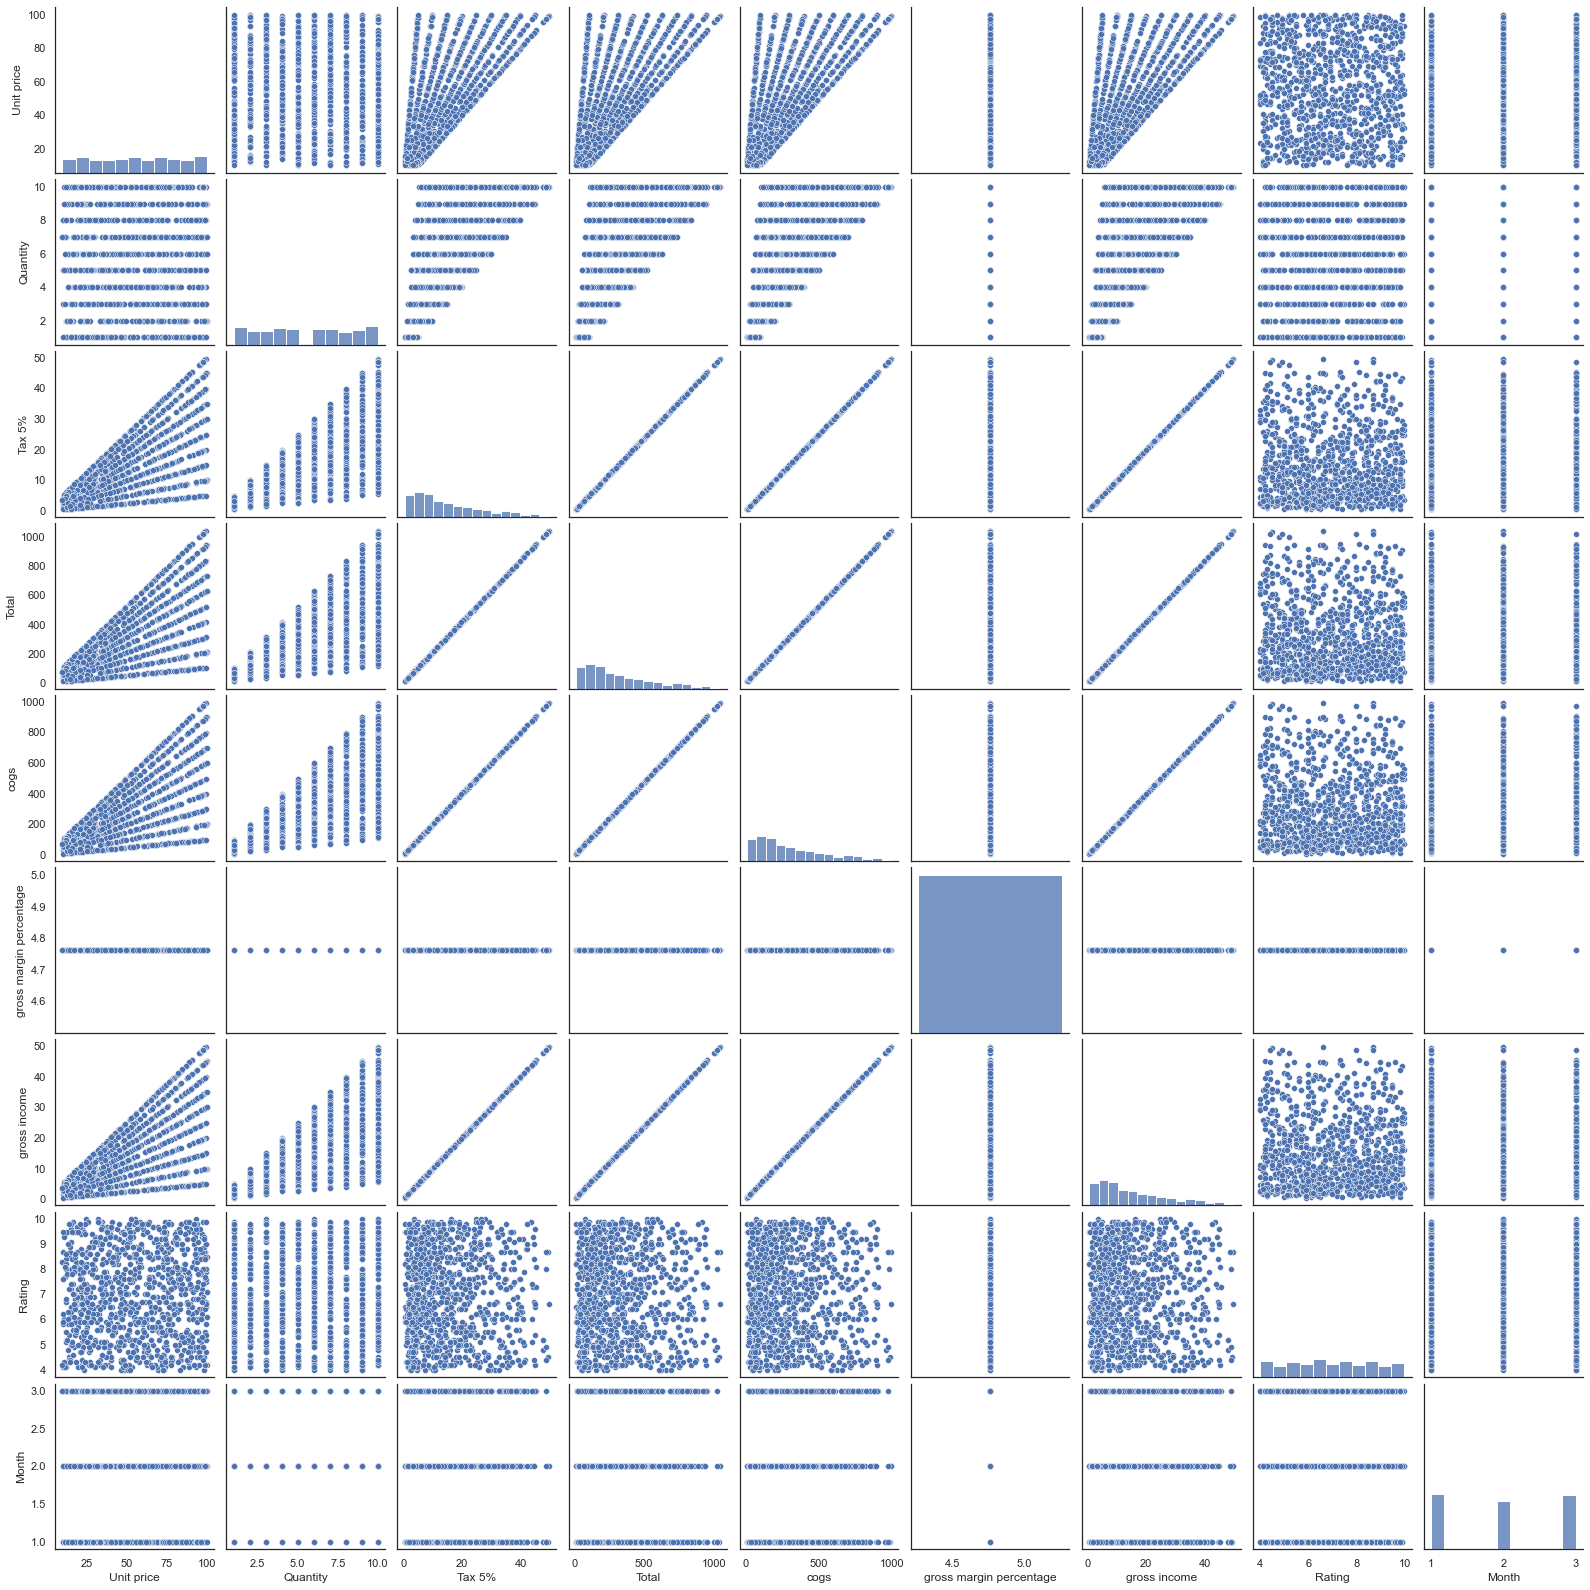

In [144]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(supermarketSales)
plt.savefig("correlacio.png", dpi = 300, bbox_inches = 'tight')

<function matplotlib.pyplot.show(close=None, block=None)>

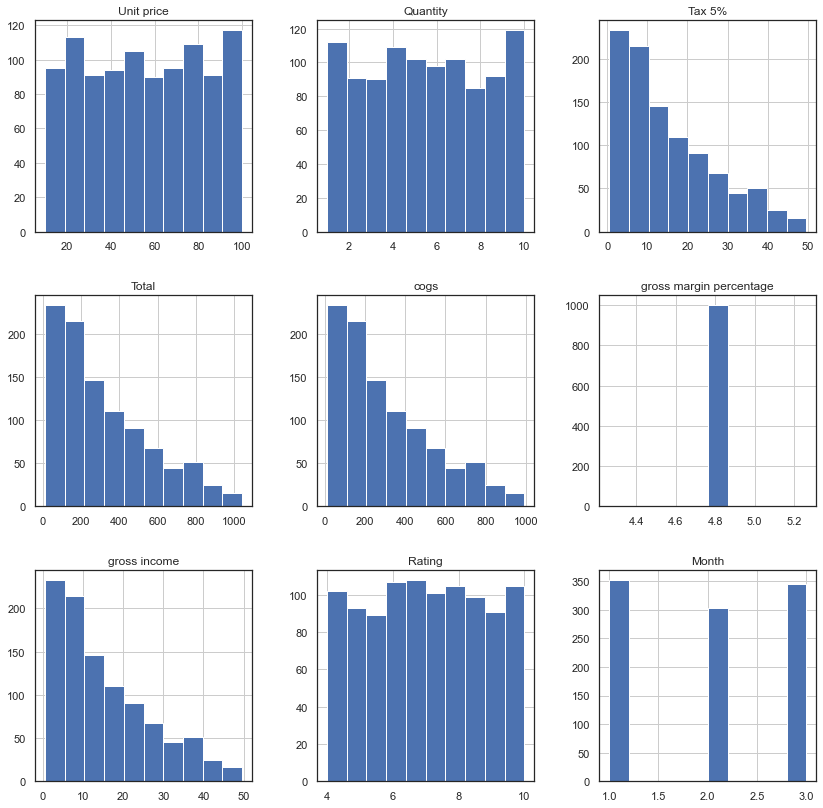

In [141]:
supermarketSales.hist(figsize=(14,14))

plt.show